# Introduction to DEA Mangroves <img align="right" src="../Supplementary_data/dea_logo.jpg">

* **[Sign up to the DEA Sandbox](https://app.sandbox.dea.ga.gov.au/)** to run this notebook interactively from a browser
* **Compatibility:** Notebook currently compatible with the `DEA Sandbox` environment
* **Products used:** 
[ga_ls_mangrove_cover_cyear_3](https://explorer.dea.ga.gov.au/products/ga_ls_mangrove_cover_cyear_3)

## Background

Mangroves are unique, valuable and vulnerable woody plant species that inhabit intertidal regions around much of the Australian coastline.

They provide a diverse array of ecosystem services such as:

* coastal protection
* carbon storage
* nursery grounds and habitat for a huge variety of avian, coastal and marine animal species.

However, mangrove ecosystems are impacted upon by both natural and anthropogenic drivers of change such as sea-level rise, coastal land reclaimation and severe tropical cyclone damage.
In Australia, mangroves are protected by law and consequently, changes in their extent and canopy density are driven predominantly by natural drivers.

Modelling mangrove canopy density offers an effective mechanism to assess how mangroves are responding to these external influences and to monitor their recovery to ensure that they can continue to thrive and support our vital coastal ecosystems.

### What this product offers

The [DEA Mangroves](https://knowledge.dea.ga.gov.au/data/product/dea-mangrove-canopy-cover-landsat) data product maps the annual canopy cover density of Australian mangroves within a fixed extent around the entire continental coastline. 
The extent represents a union of [Global Mangrove Watch layers](https://data.unep-wcmc.org/datasets/45) for multiple years, produced by the Japanese Aerospace Exploration Agency.

Within this extent, mangroves are identified by leveraging a relationship between the 10th percentile green vegetation component of the DEA [Fractional Cover](https://knowledge.dea.ga.gov.au/data/product/dea-fractional-cover-landsat) data product with Light Detection And Ranging (LiDAR)-derived Planimetric Canopy Cover% (PCC).
More detail on the method can be found [here](https://www.sciencedirect.com/science/article/pii/S0034425719301890?via%3Dihub).

Three cover classes are identified within the product which are defined as:

* Closed Forest -  pixels with more than 80 % mangrove canopy cover
* Open Forest - pixels with between 50 % and 80 % canopy cover
* Woodland - pixels with between 20 % and 50 % canopy cover

### Publications

* Lymburner, L., Bunting, P., Lucas, R., Scarth, P., Alam, I., Phillips, C., Ticehurst, C., & Held, A., (2020). Mapping the multi-decadal mangrove dynamics of the Australian coastline. Remote Sensing of Environment, 238, 111185. Available at: https://doi.org/10.1016/j.rse.2019.05.004

## Description

This notebook introduces the DEA Mangroves data product and steps through how to:

1. View the product name and associated measurements in the DEA database
2. Load the dataset and view the data classes within it
3. Plot a single timestep image
4. Create and view an animation of the whole timeseries
5. Plot change over time by graphing the timeseries of each class
6. Identify hotspot change areas within each class

<div class="alert alert-info">
    
**Note:** Visit the [DEA Mangroves product documentation](https://knowledge.dea.ga.gov.au/data/product/dea-mangrove-canopy-cover-landsat) for detailed technical information including methods, quality, and data access.
    
</div>

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages that are used for the analysis.

In [1]:
%matplotlib inline

import datacube
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datacube.utils import masking
from IPython.core.display import Video
from matplotlib.colors import LinearSegmentedColormap

import sys

sys.path.insert(1, "../Tools/")
from dea_tools.plotting import display_map, xr_animation

### Connect to the datacube

Connect to the datacube so we can access DEA data.
The `app` parameter is a unique name for the analysis which is based on the notebook file name.

In [2]:
dc = datacube.Datacube(app="DEA_Mangroves")

## Available products and measurements

### List products available in Digital Earth Australia

In [3]:
dc_products = dc.list_products()
dc_products.loc[["ga_ls_mangrove_cover_cyear_3"]]

,name,description,license,default_crs,default_resolution
name,,,,,
ga_ls_mangrove_cover_cyear_3,ga_ls_mangrove_cover_cyear_3,Geoscience Australia Landsat Mangrove Cover Ca...,CC-BY-4.0,EPSG:3577,"(-30, 30)"


### List measurements

View the list of measurements associated with the DEA Mangroves product.
Note the single measurement unit, the nodata value and the flags_definitions.

In [4]:
dc_measurements = dc.list_measurements()
dc_measurements.loc[["ga_ls_mangrove_cover_cyear_3"]]

,,name,dtype,units,nodata,aliases,flags_definition
product,measurement,,,,,,
ga_ls_mangrove_cover_cyear_3,canopy_cover_class,canopy_cover_class,uint8,1,255,NaN,"{'woodland': {'bits': [0, 1, 2, 3, 4, 5, 6, 7]..."


## Loading data

### Select and view your study area

**If running the notebook for the first time,** keep the default settings below.
This will demonstrate how the analysis works and provide meaningful results.
Zoom around the displayed map to understand the context of the analysis area.
To select a new area, click on the map to reveal the Latitude (`y`) and Longitude (`x`) for diagonally opposite corners and place these values into the `query`

Replace the `y` and `x` coordinates to try the following locations:

* Bowling Green Bay, Qld
    * "y": (-19.50688750115376, -19.27501266742088)
    * "x": (147.05183029174404, 147.47617721557216)
* Pellew Islands, NT
    * "y": (-15.6786, -16.0075)
    * "x": (136.5360, 137.0682)

In [5]:
# Set up a region to load data -27.26, -27.30; 153.047, 153.087
query = {
    "y": (-27.26, -27.278),
    "x": (153.054, 153.0725),
    "time": ("2016", "2018"),
}
display_map(x=query["x"], y=query["y"])

### Load and view DEA Mangroves

In [6]:
# Load data from the DEA datacube catalogue
mangroves = dc.load(product="ga_ls_mangrove_cover_cyear_3", **query)
mangroves

<xarray.Dataset> Size: 18kB
Dimensions:             (time: 3, y: 77, x: 72)
Coordinates:
  * time                (time) datetime64[ns] 24B 2016-07-01T23:59:59.999999 ...
  * y                   (y) float64 616B -3.125e+06 -3.125e+06 ... -3.128e+06
  * x                   (x) float64 576B 2.05e+06 2.05e+06 ... 2.052e+06
    spatial_ref         int32 4B 3577
Data variables:
    canopy_cover_class  (time, y, x) uint8 17kB 255 255 3 3 ... 255 255 255 255
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

### View the DEA Mangroves class values and definitions

You'll see that four classes are identified in this dataset.
The `notobserved` class was separated from `nodata` pixels in this workflow to identify locations where mangroves have been observed but there is poor observation density.
This class is usually insignificant in size and has not been included in the remainder of this notebook analysis.

In [7]:
# Extract the flags information from the dataset
flags = masking.describe_variable_flags(mangroves)
flags["bits"] = flags["bits"].astype(str)
flags = flags.sort_values(by="bits")

# Append the class descriptions to each class
descriptors = {
    "closed_forest": "> 80 % canopy cover",
    "open_forest": "50 - 80 % canopy cover",
    "woodland": "20 - 50 % canopy cover",
    "notobserved": "Fewer than 3 clear observations",
}
flags = flags.rename(columns={"description": "class"})
flags["description"] = pd.Series(data=descriptors, index=flags.index)

# View the values in the dataset that are associated with each class
flags

,bits,values,class,description
woodland,"[0, 1, 2, 3, 4, 5, 6, 7]",{'1': True},Woodland,20 - 50 % canopy cover
notobserved,"[0, 1, 2, 3, 4, 5, 6, 7]",{'0': True},Mangroves not observed,Fewer than 3 clear observations
open_forest,"[0, 1, 2, 3, 4, 5, 6, 7]",{'2': True},Open Forest,50 - 80 % canopy cover
closed_forest,"[0, 1, 2, 3, 4, 5, 6, 7]",{'3': True},Closed Forest,> 80 % canopy cover


## Plotting data

### Plot a single timestep

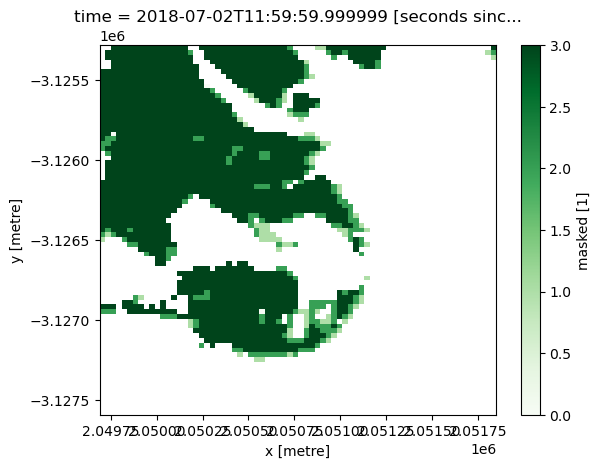

In [8]:
# Firstly, mask out the nodata values
mangroves["masked"] = mangroves.canopy_cover_class.where(mangroves.canopy_cover_class != 255)

# Plot the most recent timestep
mangroves["masked"].isel(time=-1).plot(cmap="Greens")

### View all timesteps as an animation

In [9]:
# Produce a time series animation of mangrove canopy cover
xr_animation(
    ds=mangroves,
    bands=["masked"],
    output_path="DEA_Mangroves.mp4",
    annotation_kwargs={"fontsize": 20, "color": "white"},
    show_date="%Y",
    imshow_kwargs={"cmap": "Greens"},
    show_colorbar=True,
    interval=1000,
    width_pixels=800,
)

# Plot animation
plt.close()

# View and interact with the animation
Video("DEA_Mangroves.mp4", embed=True)

Exporting animation to DEA_Mangroves.mp4


  0%|          | 0/3 (0.0 seconds remaining at ? frames/s)

## Plot the area (number of pixels) occupied by each class at every timestep in the area of interest

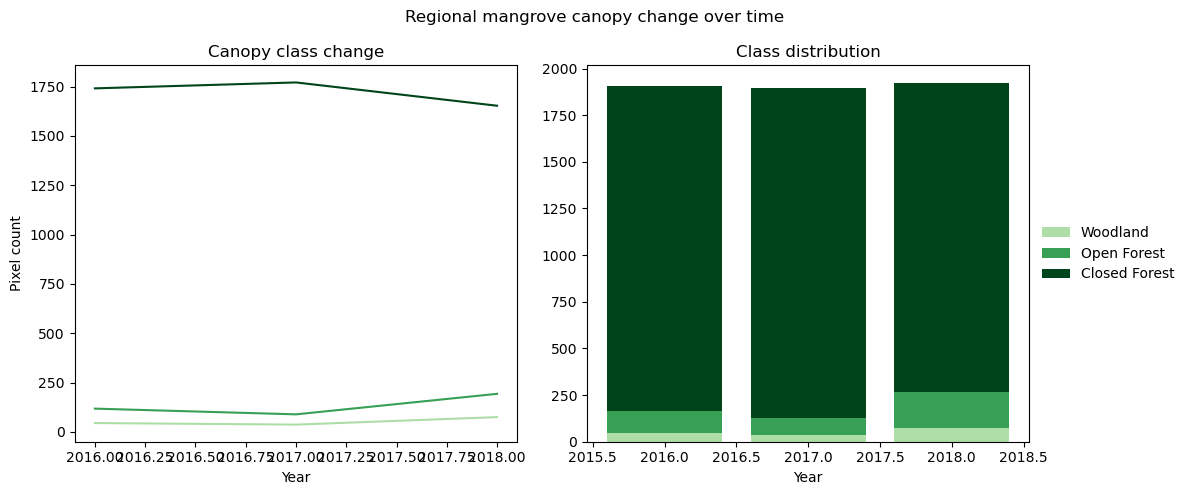

In [10]:
# Set up the data for plotting: count the number of pixels per class in the loaded location
mangroves["closed_forest"]= mangroves.canopy_cover_class.where(mangroves.canopy_cover_class == 3)
mangroves["open_forest"] = mangroves.canopy_cover_class.where(mangroves.canopy_cover_class == 2)
mangroves["woodland"] = mangroves.canopy_cover_class.where(mangroves.canopy_cover_class == 1)

y1 = mangroves["woodland"].count(dim=["y", "x"])
y2 = mangroves["open_forest"].count(dim=["y", "x"])
y3 = mangroves["closed_forest"].count(dim=["y", "x"])

# Simplify the date labels for the x-axis
x = np.arange(int(query["time"][0]), int(query["time"][-1]) + 1, 1)

# Prepare the figures
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Regional mangrove canopy change over time")

# Plot the single class summaries
axs[0].plot(x, y1, color="#aedea7", label="Woodland")
axs[0].plot(x, y2, color="#37a055", label="Open Forest")
axs[0].plot(x, y3, color="#00441b", label="Closed Forest")
axs[0].set_title("Canopy class change")
axs[0].set(ylabel="Pixel count", xlabel="Year")

# Stack the classes to plot a snapshot of the region at each time step
axs[1].bar(x, y1, color="#aedea7", label="Woodland")
axs[1].bar(x, y2, color="#37a055", label="Open Forest", bottom=y1)
axs[1].bar(x, y3, color="#00441b", label="Closed Forest", bottom=(y1 + y2))
axs[1].legend(bbox_to_anchor=(1.0, 0.5), loc="center left", frameon=False)
axs[1].set_title("Class distribution")
axs[1].set(xlabel="Year")

plt.tight_layout()
plt.show()

In [11]:
#Convert mangroves from xarray.Dataset to gpd

import xarray as xr

df= mangroves.to_dataframe().reset_index()
df.head()

,time,y,x,spatial_ref,canopy_cover_class,masked,closed_forest,open_forest,woodland
0,2016-07-01 23:59:59.999999,-3125295.0,2049705.0,3577,255,NaN,NaN,NaN,NaN
1,2016-07-01 23:59:59.999999,-3125295.0,2049735.0,3577,255,NaN,NaN,NaN,NaN
2,2016-07-01 23:59:59.999999,-3125295.0,2049765.0,3577,3,3.0,3.0,NaN,NaN
3,2016-07-01 23:59:59.999999,-3125295.0,2049795.0,3577,3,3.0,3.0,NaN,NaN
4,2016-07-01 23:59:59.999999,-3125295.0,2049825.0,3577,3,3.0,3.0,NaN,NaN


In [12]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df['x'], df['y'])]

gdf_mangroves = gpd.GeoDataFrame(df, geometry=geometry)

gdf_mangroves.set_crs("EPSG:3577", inplace=True)

gdf_mangroves.head()

,time,y,x,spatial_ref,canopy_cover_class,masked,closed_forest,open_forest,woodland,geometry
0,2016-07-01 23:59:59.999999,-3125295.0,2049705.0,3577,255,NaN,NaN,NaN,NaN,POINT (2049705.000 -3125295.000)
1,2016-07-01 23:59:59.999999,-3125295.0,2049735.0,3577,255,NaN,NaN,NaN,NaN,POINT (2049735.000 -3125295.000)
2,2016-07-01 23:59:59.999999,-3125295.0,2049765.0,3577,3,3.0,3.0,NaN,NaN,POINT (2049765.000 -3125295.000)
3,2016-07-01 23:59:59.999999,-3125295.0,2049795.0,3577,3,3.0,3.0,NaN,NaN,POINT (2049795.000 -3125295.000)
4,2016-07-01 23:59:59.999999,-3125295.0,2049825.0,3577,3,3.0,3.0,NaN,NaN,POINT (2049825.000 -3125295.000)


In [13]:
import os

# Change the directory to the folder where the file is saved
os.chdir('/home/jovyan/Research Project NB')

# load the file
import geopandas as gpd
sentinel2017_points_gdf = gpd.read_file('sentinel2017_points.geojson')

# Check the first few rows to ensure it loaded correctly
print(sentinel2017_points_gdf.head())

#A point dataset providing robust rates of coastal change for every 30 m along Australia’s non-rocky coastlines
#The most recent annual shoreline is used as a baseline for measuring rates of change (2023).


   dist_2017  dist_2018                          geometry
0   2.618085  -2.007708  POINT (2049740.000 -3126934.037)
1   2.559974  -1.128715  POINT (2049770.416 -3126932.927)
2   0.523536  -0.518860  POINT (2049792.807 -3126943.351)
3   1.497304  -0.069249  POINT (2049820.515 -3126944.417)
4   1.085218  -1.930745  POINT (2049850.639 -3126941.632)


In [14]:
# Check CRS of both GeoDataFrames
print(gdf_mangroves.crs)
print(sentinel2017_points_gdf.crs)

# If they are not in the same CRS, reproject them
if gdf_mangroves.crs != sentinel2017_points_gdf.crs:
    sentinel2017_points_gdf = sentinel2023_points_gdf.to_crs(gdf_mangroves.crs)
print(sentinel2017_points_gdf.crs)

EPSG:3577
EPSG:3577
EPSG:3577


In [15]:
import geopandas as gpd
from shapely.geometry import Point, box

# Function to convert point to 30x30 meter square polygon
def point_to_square(point, size=30):
    # Calculate half the size for the buffer
    half_size = size / 2
    
    # Create a bounding box (square) centered on the point
    minx = point.x - half_size
    miny = point.y - half_size
    maxx = point.x + half_size
    maxy = point.y + half_size
    
    # Create a square polygon
    return box(minx, miny, maxx, maxy)

# Apply the function to convert the points in mangroves to square polygons
gdf_mangroves['geometry'] = gdf_mangroves['geometry'].apply(lambda x: point_to_square(x, size=30))
# Convert to GeoDataFrame with proper CRS (ensure the CRS is set)
gdf_mangroves = gpd.GeoDataFrame(gdf_mangroves, geometry='geometry', crs='EPSG:3577') 

In [16]:
import geopandas as gpd
import pandas as pd

# Define specific years to analyze
years_of_interest = [2017, 2018]  # Directly specify years
results = []

for year in years_of_interest:
    shoreline_data = sentinel2017_points_gdf[['geometry', f'dist_{year}']].copy()
    shoreline_data['year'] = year

    # Select mangrove data from the previous year (year - 1)
    mangrove_data = gdf_mangroves[gdf_mangroves['time'].dt.year == (year - 1)]
    
    # Perform spatial join
    joined = gpd.sjoin(shoreline_data, mangrove_data, how='inner', predicate='intersects')
    
    # Extract relevant data and analyze changes (e.g., how mangrove cover class has changed)
    for idx, row in joined.iterrows():
        mangrove_cover = row[['geometry', 'masked', 'closed_forest', 'open_forest', 'woodland']]
        
        # Track how mangrove cover has changed over time
        results.append({
            'year': year,  # Still stores the current year
            'shoreline_position': row['dist_' + str(year)],
            'geometry': mangrove_cover['geometry'],
            'masked': mangrove_cover['masked'],
            'closed_forest': mangrove_cover['closed_forest'],
            'open_forest': mangrove_cover['open_forest'],
            'woodland': mangrove_cover['woodland']
        })

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results)
results_df.tail(100)


,year,shoreline_position,geometry,masked,closed_forest,open_forest,woodland
268,2018,0.984979,POINT (2051080.8360042186 -3126322.2388574025),NaN,NaN,NaN,NaN
269,2018,-1.426874,POINT (2051063.4819882775 -3126298.1860142117),2.0,NaN,2.0,NaN
270,2018,-3.990252,POINT (2051046.6502040892 -3126271.791620345),2.0,NaN,2.0,NaN
271,2018,-3.646182,POINT (2051037.4552821873 -3126252.860759125),2.0,NaN,2.0,NaN
272,2018,-1.587408,POINT (2051015.543441312 -3126231.2548157447),NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
363,2018,-5.557592,POINT (2050827.3642823834 -3125419.316598514),2.0,NaN,2.0,NaN
364,2018,-3.011607,POINT (2050820 -3125391.811856861),2.0,NaN,2.0,NaN
365,2018,-2.641637,POINT (2050800.8118449526 -3125373.526135097),2.0,NaN,2.0,NaN
366,2018,-1.634208,POINT (2050784.0439556607 -3125346.751562218),NaN,NaN,NaN,NaN


In [17]:
import geopandas as gpd

# Assuming your GeoDataFrame is named 'gdf'
results_df['masked'] = results_df['masked'].fillna(0)

# Check if the NaN values were replaced
results_df.tail(100)


,year,shoreline_position,geometry,masked,closed_forest,open_forest,woodland
268,2018,0.984979,POINT (2051080.8360042186 -3126322.2388574025),0.0,NaN,NaN,NaN
269,2018,-1.426874,POINT (2051063.4819882775 -3126298.1860142117),2.0,NaN,2.0,NaN
270,2018,-3.990252,POINT (2051046.6502040892 -3126271.791620345),2.0,NaN,2.0,NaN
271,2018,-3.646182,POINT (2051037.4552821873 -3126252.860759125),2.0,NaN,2.0,NaN
272,2018,-1.587408,POINT (2051015.543441312 -3126231.2548157447),0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
363,2018,-5.557592,POINT (2050827.3642823834 -3125419.316598514),2.0,NaN,2.0,NaN
364,2018,-3.011607,POINT (2050820 -3125391.811856861),2.0,NaN,2.0,NaN
365,2018,-2.641637,POINT (2050800.8118449526 -3125373.526135097),2.0,NaN,2.0,NaN
366,2018,-1.634208,POINT (2050784.0439556607 -3125346.751562218),0.0,NaN,NaN,NaN


In [18]:
print(results_df.columns)


Index(['year', 'shoreline_position', 'geometry', 'masked', 'closed_forest',
       'open_forest', 'woodland'],
      dtype='object')


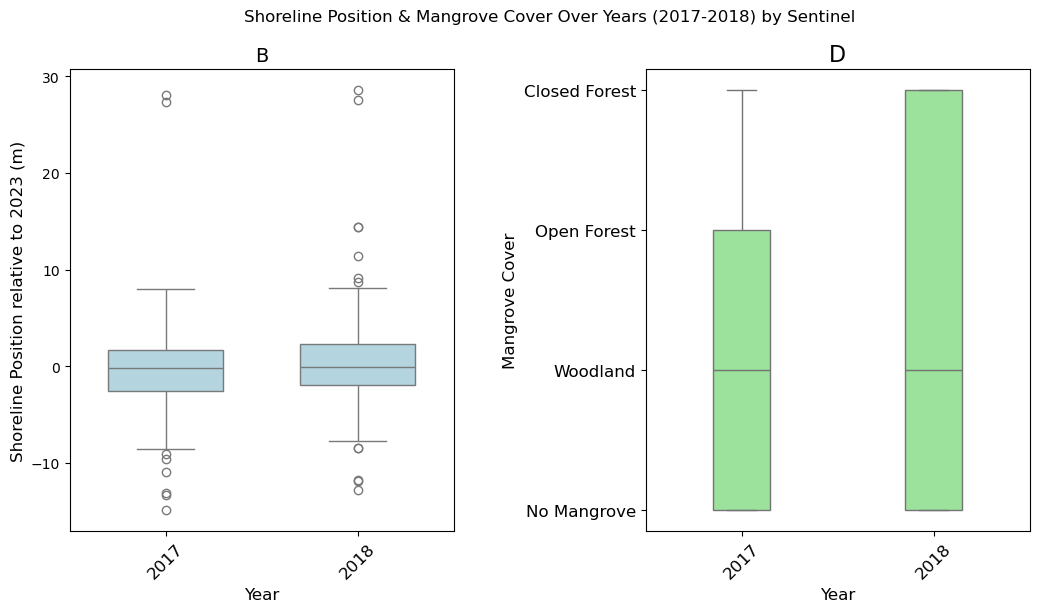

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Rename columns for clarity
results_df.rename(columns={"shoreline_position": "Shoreline (m)", "masked": "Mangrove Cover"}, inplace=True)

# Filter only years 2017 and 2018
results_df_filtered = results_df[results_df["year"].isin([2017, 2018])]

# Create figure with adjusted width for shoreline plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1]})  # Keep equal size initially


# **Shift mangrove plot right using bbox adjustments**
plt.subplots_adjust(left=0.1, right=0.9, wspace=0.5)  # Increases spacing between plots


# Boxplot for Shoreline Position (Left)
sns.boxplot(data=results_df_filtered, x=results_df_filtered["year"].astype(str), y="Shoreline (m)", ax=axes[0], color="lightblue", width=0.6)
axes[0].set_title("B", fontsize=14)  # Increase title size
axes[0].set_xlabel("Year", fontsize=12)  # Increase x-axis label size
axes[0].set_ylabel("Shoreline Position relative to 2023 (m)", fontsize=12)  # Increase y-axis label size

# Boxplot for Mangrove Cover (Right)
sns.boxplot(data=results_df_filtered, x=results_df_filtered["year"].astype(str), y="Mangrove Cover", ax=axes[1], color="lightgreen", width=0.3)  
axes[1].set_title("D", fontsize=16)  
axes[1].set_xlabel("Year", fontsize=12)  
axes[1].set_ylabel("Mangrove Cover", fontsize=12)  
axes[1].set_yticks([0, 1, 2, 3])
axes[1].set_yticklabels(["No Mangrove", "Woodland", "Open Forest", "Closed Forest"], fontsize=12)  # Increase tick label size

# Adjust x-axis label font size & rotation
for ax in axes:
    ax.set_xticks(["2017", "2018"])
    ax.set_xticklabels(["2017", "2018"], rotation=45, fontsize=12)

# Increase the overall title font size
plt.suptitle("Shoreline Position & Mangrove Cover Over Years (2017-2018) by Sentinel", fontsize=16)


# Show the plot
plt.suptitle("Shoreline Position & Mangrove Cover Over Years (2017-2018) by Sentinel")
plt.show()


/tmp/ipykernel_2858/3507210504.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x="Mangrove Cover", y="erosion", palette="viridis")


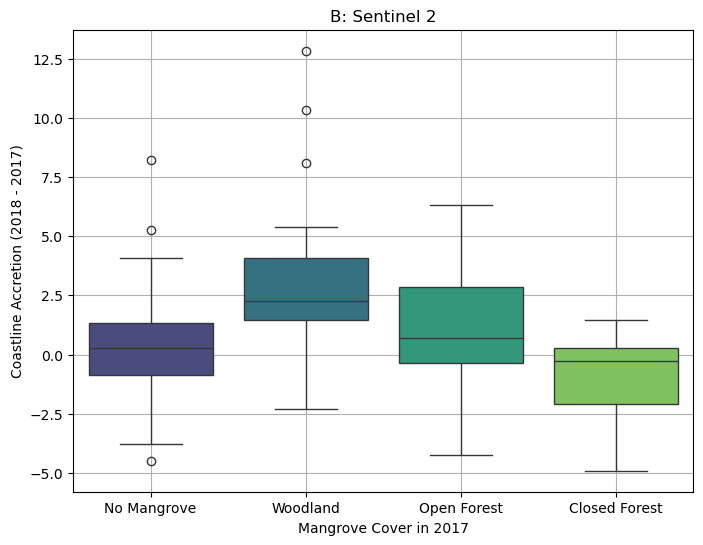

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Extract 2017 and 2018 data
df_2017 = results_df[results_df["year"] == 2017][["geometry", "Mangrove Cover", "Shoreline (m)"]]
df_2018 = results_df[results_df["year"] == 2018][["geometry", "Shoreline (m)"]]

# Step 2: Merge 2017 and 2018 data on geometry to align locations
df_combined = df_2017.merge(df_2018, on="geometry", suffixes=("_2017", "_2018"))

# Step 3: Calculate erosion (difference between 2018 and 2017 shoreline position)
df_combined["erosion"] = df_combined["Shoreline (m)_2018"] - df_combined["Shoreline (m)_2017"]

# Step 4: Visualize erosion by mangrove cover type in 2017
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_combined, x="Mangrove Cover", y="erosion", palette="viridis")

# Customize labels
plt.xlabel("Mangrove Cover in 2017")
plt.ylabel("Coastline Accretion (2018 - 2017)")
plt.title("B: Sentinel 2")
plt.xticks(ticks=[0, 1, 2, 3], labels=["No Mangrove", "Woodland", "Open Forest", "Closed Forest"])
plt.grid(True)

# Show plot
plt.show()


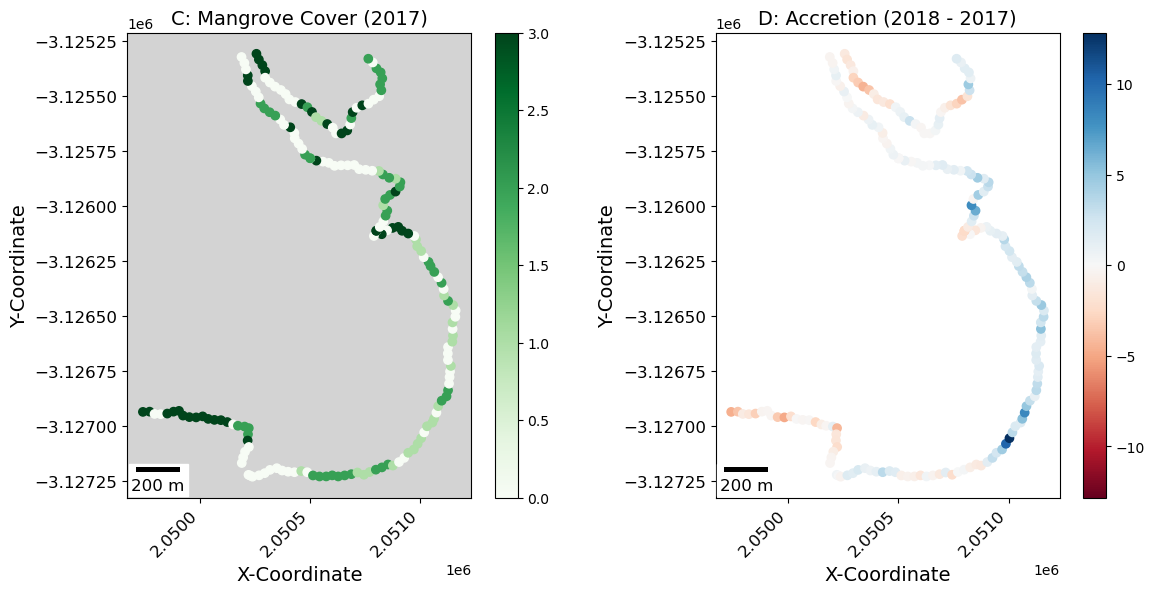

In [21]:
!pip install matplotlib-scalebar
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar  # Import scale bar module

# Convert df_combined into a GeoDataFrame
df_combined_gdf = gpd.GeoDataFrame(df_combined, geometry="geometry", crs="EPSG:3577")  # Ensure correct CRS

# Create figure and axes for side-by-side maps
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# **Map 1: Mangrove Cover Pixels (Left)**
df_combined_gdf.plot(column="Mangrove Cover", ax=axes[0], cmap="Greens", legend=True)
axes[0].set_title("C: Mangrove Cover (2017)", fontsize=14)  # Increase title size
axes[0].set_xlabel("X-Coordinate", fontsize=14)  # Customize axis labels
axes[0].set_ylabel("Y-Coordinate", fontsize=14)  
axes[0].tick_params(axis="both", labelsize=12)  # Increase tick label size

# **Set Background to Light Grey**
axes[0].set_facecolor("lightgrey")

# **Add Scale Bar to Map 1**
axes[0].add_artist(ScaleBar(1, location="lower left", units="m", scale_loc="bottom", font_properties={"size": 12}))

# Define min/max values for shoreline change to center at 0
vmin, vmax = df_combined_gdf["erosion"].min(), df_combined_gdf["erosion"].max()
abs_max = max(abs(vmin), abs(vmax))  # Ensure symmetric color scale

# **Map 2: Shoreline Change Rates (Right)**
df_combined_gdf.plot(column="erosion", ax=axes[1], cmap="RdBu", legend=True, vmin=-abs_max, vmax=abs_max)
axes[1].set_title("D: Accretion (2018 - 2017)", fontsize=14)
axes[1].set_xlabel("X-Coordinate", fontsize=14)
axes[1].set_ylabel("Y-Coordinate", fontsize=14)
axes[1].tick_params(axis="both", labelsize=12)

# **Add Scale Bar to Map 2**
axes[1].add_artist(ScaleBar(1, location="lower left", units="m", scale_loc="bottom", font_properties={"size": 12}))

# Rotate x-axis labels to avoid overlap
for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Adjust spacing for better visualization
plt.tight_layout()
plt.show()


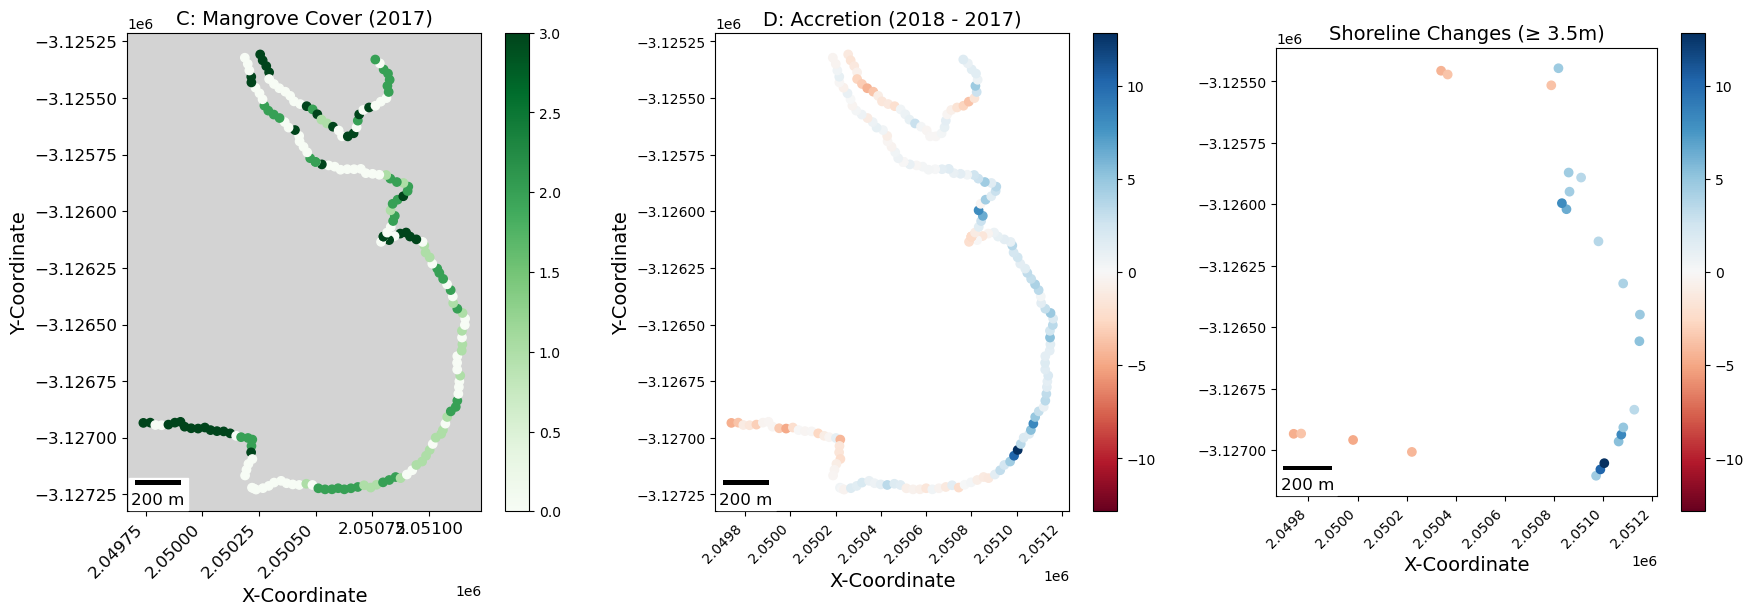

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

# Convert df_combined into a GeoDataFrame
df_combined_gdf = gpd.GeoDataFrame(df_combined, geometry="geometry", crs="EPSG:3577")

# **Apply Threshold: Remove Small Changes (<3.5m)**
df_combined_gdf_filtered = df_combined_gdf[
    df_combined_gdf["erosion"].abs() >= 3.5  # Keeps only significant changes ≥ 3.5m
]

# Create figure and axes for three side-by-side maps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# **Map 1: Mangrove Cover Pixels (Left)**
df_combined_gdf.plot(column="Mangrove Cover", ax=axes[0], cmap="Greens", legend=True)
axes[0].set_title("C: Mangrove Cover (2017)", fontsize=14)
axes[0].set_xlabel("X-Coordinate", fontsize=14)
axes[0].set_ylabel("Y-Coordinate", fontsize=14)
axes[0].tick_params(axis="both", labelsize=12)
axes[0].set_facecolor("lightgrey")
axes[0].add_artist(ScaleBar(1, location="lower left", units="m", scale_loc="bottom", font_properties={"size": 12}))

# Define min/max values for shoreline change to center at 0
vmin, vmax = df_combined_gdf["erosion"].min(), df_combined_gdf["erosion"].max()
abs_max = max(abs(vmin), abs(vmax))

# **Map 2: Shoreline Change Rates (Middle)**
df_combined_gdf.plot(column="erosion", ax=axes[1], cmap="RdBu", legend=True, vmin=-abs_max, vmax=abs_max)
axes[1].set_title("D: Accretion (2018 - 2017)", fontsize=14)
axes[1].set_xlabel("X-Coordinate", fontsize=14)
axes[1].set_ylabel("Y-Coordinate", fontsize=14)
axes[0].tick_params(axis="both", labelsize=12)
axes[1].add_artist(ScaleBar(1, location="lower left", units="m", scale_loc="bottom", font_properties={"size": 12}))

# **Map 3: Filtered Significant Changes (Right)**
df_combined_gdf_filtered.plot(column="erosion", ax=axes[2], cmap="RdBu", legend=True, vmin=-abs_max, vmax=abs_max)
axes[2].set_title("Shoreline Changes (≥ 3.5m)", fontsize=14)
axes[2].set_xlabel("X-Coordinate", fontsize=14)
axes[1].set_ylabel("Y-Coordinate", fontsize=14)
axes[0].tick_params(axis="both", labelsize=12)
axes[2].add_artist(ScaleBar(1, location="lower left", units="m", scale_loc="bottom", font_properties={"size": 12}))

# Rotate x-axis labels to avoid overlap
for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")


# Adjust spacing for better visualization
plt.tight_layout()
plt.show()

In [23]:
import scipy.stats as stats

# Prepare erosion data by mangrove cover category
groups = [
    df_combined[df_combined["Mangrove Cover"] == 0]["erosion"],  # No Mangrove
    df_combined[df_combined["Mangrove Cover"] == 1]["erosion"],  # Woodland
    df_combined[df_combined["Mangrove Cover"] == 2]["erosion"],  # Open Forest
    df_combined[df_combined["Mangrove Cover"] == 3]["erosion"],  # Closed Forest
]


In [24]:
from scipy import stats
import numpy as np

# Combine all groups into a single dataset (drop NaN values)
all_data = np.concatenate([group.dropna() for group in groups])

# Perform Shapiro-Wilk normality test
shapiro_stat, shapiro_p = stats.shapiro(all_data)
print(f"Shapiro-Wilk Test: p-value = {shapiro_p:.4f}")
#not normal p<0.05 require ANOVA p<0.01 to reject null hypothesis

Shapiro-Wilk Test: p-value = 0.0000


In [25]:
# Levene’s test for homogeneity of variance
levene_stat, levene_p = stats.levene(*[group.dropna() for group in groups])
print(f"Levene's Test: p-value = {levene_p:.4f}")

#equal variance p>0.05

Levene's Test: p-value = 0.2441


In [26]:
from scipy import stats

# Perform Kruskal-Wallis test across all mangrove cover categories
kruskal_stat, kruskal_p = stats.kruskal(*[group.dropna() for group in groups])

print(f"Kruskal-Wallis Test: H-statistic = {kruskal_stat:.4f}, p-value = {kruskal_p:.4f}")


Kruskal-Wallis Test: H-statistic = 42.9436, p-value = 0.0000


In [27]:
!pip install scikit-posthocs

import scikit_posthocs as sp

# Perform Dunn's test with Bonferroni correction for multiple comparisons
dunn_results = sp.posthoc_dunn(groups, p_adjust='bonferroni')

print(dunn_results)


          1             2         3             4
1  1.000000  2.166170e-05  0.307016  3.426960e-02
2  0.000022  1.000000e+00  0.036167  2.377080e-09
3  0.307016  3.616660e-02  1.000000  2.251943e-04
4  0.034270  2.377080e-09  0.000225  1.000000e+00


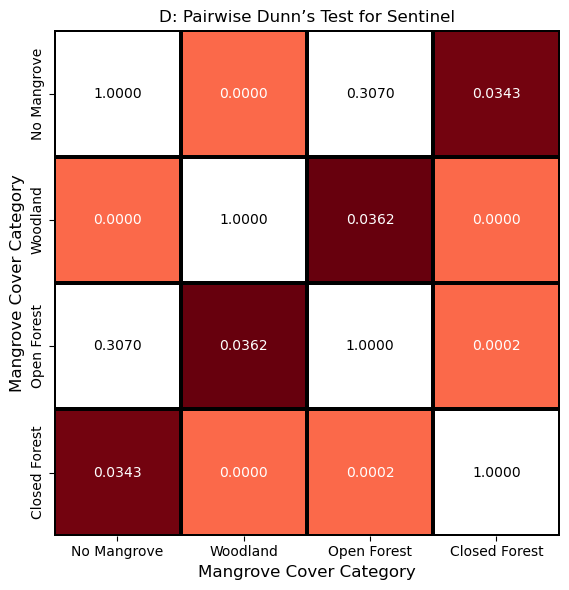

In [28]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scikit_posthocs as sp


# Rename categories for clarity
category_labels = ["No Mangrove", "Woodland", "Open Forest", "Closed Forest"]
dunn_results.index = category_labels
dunn_results.columns = category_labels

# Create mask for non-significant values (p ≥ 0.05)
mask = dunn_results >= 0.05

# **Plot heatmap with black outlines**
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    dunn_results, annot=False, fmt=".4f", cmap="Reds", center=0,
    linewidths=1.5,  # Increase linewidth for bold outlines
    linecolor="black",  # Set outline color to black
    mask=mask, cbar=False, square=True  # Ensure boxes are square for consistency
)

# **Manually add annotations with black or white text**
for i in range(dunn_results.shape[0]):
    for j in range(dunn_results.shape[1]):
        p_value = dunn_results.iloc[i, j]
        text_color = "black" if p_value >= 0.05 else "white"  # Black for non-significant, white for significant
        ax.text(j + 0.5, i + 0.5, f"{p_value:.4f}", ha="center", va="center", fontsize=10, color=text_color)

# **Enhance title and labels**
plt.title("D: Pairwise Dunn’s Test for Sentinel", fontsize=12)
plt.xlabel("Mangrove Cover Category", fontsize=12)
plt.ylabel("Mangrove Cover Category", fontsize=12)

# Adjust layout for cleaner visualization
plt.tight_layout()
plt.show()


In [29]:
print("\nGrouped Erosion Statistics by Mangrove Cover:")
print(df_combined.groupby("Mangrove Cover")["erosion"].describe())



Grouped Erosion Statistics by Mangrove Cover:
                count      mean       std       min       25%       50%  \
Mangrove Cover                                                            
0.0              79.0  0.290595  2.047167 -4.512986 -0.870583  0.295970   
1.0              27.0  3.006782  3.230323 -2.285238  1.447976  2.279138   
2.0              45.0  1.146415  2.098639 -4.241191 -0.359134  0.704052   
3.0              37.0 -0.907086  1.659433 -4.908940 -2.078771 -0.286234   

                     75%        max  
Mangrove Cover                       
0.0             1.353389   8.236454  
1.0             4.099665  12.838144  
2.0             2.837194   6.339808  
3.0             0.262040   1.443321  


***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Discord chat](https://discord.com/invite/4hhBQVas5U) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [GitHub](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** December 2023

**Compatible datacube version:** 1.8.13

In [30]:
print(datacube.__version__)

1.8.19


## Tags
<!-- Browse all available tags on the DEA User Guide's [Tags Index](https://knowledge.dea.ga.gov.au/genindex/) -->

In [31]:
# **Apply Threshold: Remove Small Changes (<3.5m)**
df_combined5_gdf_filtered = df_combined_gdf[
    df_combined_gdf["erosion"].abs() >= 3.5  # Keeps only significant changes ≥ 3.5m
]

In [32]:
import scipy.stats as stats

# Prepare erosion data by mangrove cover category from the filtered dataset
groups_filtered = [
    df_combined5_gdf_filtered[df_combined_gdf_filtered["Mangrove Cover"] == 0]["erosion"],  # No Mangrove
    df_combined5_gdf_filtered[df_combined_gdf_filtered["Mangrove Cover"] == 1]["erosion"],  # Woodland
    df_combined5_gdf_filtered[df_combined_gdf_filtered["Mangrove Cover"] == 2]["erosion"],  # Open Forest
    df_combined5_gdf_filtered[df_combined_gdf_filtered["Mangrove Cover"] == 3]["erosion"],  # Closed Forest
]



/tmp/ipykernel_2858/3348958452.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined5_gdf_filtered, x="Mangrove Cover", y="erosion", palette="viridis")


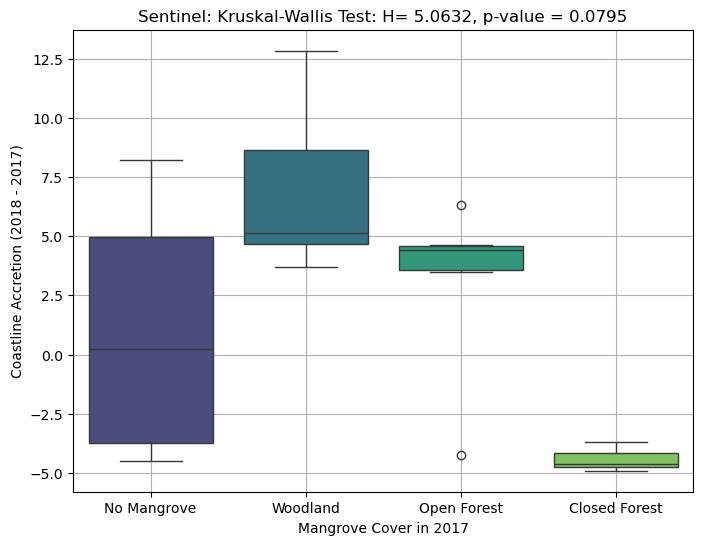

In [33]:
# Visualize erosion by mangrove cover type in 2017
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_combined5_gdf_filtered, x="Mangrove Cover", y="erosion", palette="viridis")

# Customize labels
plt.xlabel("Mangrove Cover in 2017")
plt.ylabel("Coastline Accretion (2018 - 2017)")
plt.title("Sentinel: Kruskal-Wallis Test: H= 5.0632, p-value = 0.0795")
plt.xticks(ticks=[0, 1, 2, 3], labels=["No Mangrove", "Woodland", "Open Forest", "Closed Forest"])
plt.grid(True)

# Show plot
plt.show()


In [34]:
# Remove 'Closed Forest' (Mangrove Cover = 3) from groups_filtered
groups5_filtered = [
    df_combined5_gdf_filtered[df_combined_gdf_filtered["Mangrove Cover"] == 0]["erosion"],  # No Mangrove
    df_combined5_gdf_filtered[df_combined_gdf_filtered["Mangrove Cover"] == 1]["erosion"],  # Woodland
    df_combined5_gdf_filtered[df_combined_gdf_filtered["Mangrove Cover"] == 2]["erosion"],  # Open Forest
]

# Perform Kruskal-Wallis test only on the remaining groups
kruskal_stat, kruskal_p = stats.kruskal(*[group.dropna() for group in groups5_filtered])

print(f"Kruskal-Wallis Test: H-statistic = {kruskal_stat:.4f}, p-value = {kruskal_p:.4f}")



Kruskal-Wallis Test: H-statistic = 5.0632, p-value = 0.0795


In [35]:
num_filtered_points = df_combined5_gdf_filtered.shape[0]  # Get row count
print(f"Number of data points left after filtering: {num_filtered_points}")


Number of data points left after filtering: 24


In [36]:
# summary stats for filtered data
print("\nGrouped Erosion Statistics by Mangrove Cover:")
print(df_combined5_gdf_filtered.groupby("Mangrove Cover")["erosion"].describe())


Grouped Erosion Statistics by Mangrove Cover:
                count      mean       std       min       25%       50%  \
Mangrove Cover                                                            
0.0               6.0  0.943777  5.567597 -4.512986 -3.747586  0.224293   
1.0               8.0  6.813033  3.277675  3.680976  4.690129  5.151083   
2.0               7.0  3.257253  3.435036 -4.241191  3.555566  4.413638   
3.0               3.0 -4.407807  0.638663 -4.908940 -4.767366 -4.625793   

                     75%        max  
Mangrove Cover                       
0.0             4.977690   8.236454  
1.0             8.654471  12.838144  
2.0             4.588692   6.339808  
3.0            -4.157241  -3.688689  
